In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import math
 
%matplotlib inline
 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
df=pd.read_csv("values_probabilities.csv")
df.head()

,Unnamed: 0,Actual,Predicted
0,1,1,0.906894
1,2,1,0.883702
2,3,1,0.424980
3,4,1,0.588282
4,5,1,0.519185


In [4]:
y_true=np.array(df["Actual"])

In [7]:
y_prob=np.array(df["Predicted"])

In [9]:
#makes the prediction cutoff probability at 0.5 
y_pred5=np.where(y_prob>0.5, 1, 0)
#makes the prediction cutoff probability at 0.75
y_pred75=np.where(y_pred>0.75, 1, 0)

In [13]:
#confusion matrix for 0.5 cutoff
pd.crosstab(y_pred5, y_true, rownames=["predicted"], colnames=["actual"])

actual,0,1
predicted,,
0,535,106
1,31,89


In [14]:
#confusion matrix for 0.75 cutoff 
pd.crosstab(y_pred75, y_true, rownames=["predicted"], colnames=["actual"])

actual,0,1
predicted,,
0,561,172
1,5,23


In [18]:
print(metrics.classification_report(y_true, y_pred5))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       566
           1       0.74      0.46      0.57       195

    accuracy                           0.82       761
   macro avg       0.79      0.70      0.73       761
weighted avg       0.81      0.82      0.80       761



In [19]:
print(metrics.classification_report(y_true, y_pred75))

              precision    recall  f1-score   support

           0       0.77      0.99      0.86       566
           1       0.82      0.12      0.21       195

    accuracy                           0.77       761
   macro avg       0.79      0.55      0.54       761
weighted avg       0.78      0.77      0.70       761



In [20]:
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_prob, pos_label=1)
auc=metrics.auc(fpr, tpr)

Text(0.5, 0, '1-Specificity')

Text(0, 0.5, 'Sensitivity')

(-0.02, 1.02)

(-0.02, 1.02)

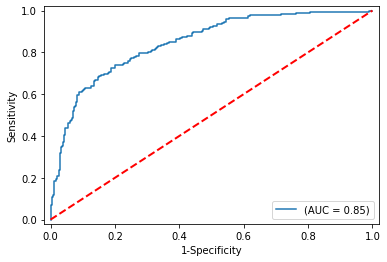

In [31]:
plt.plot(fpr, tpr, label='(AUROC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc="lower right", fontsize=10)
plt.xlabel("1-Specificity")
plt.ylabel("Sensitivity")
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])

In [32]:
precision, recall, thresholds = metrics.precision_recall_curve(y_true, y_prob, pos_label=1)
auc=metrics.auc(recall, precision)

In [ ]:
plt.plot(fpr, tpr, label='(AUPRC = %0.2f)' % auc)
plt.legend(loc="lower right", fontsize=10)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])